In [133]:
import pandas as pd
import os
from msalign import msalign
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from BaselineRemoval import BaselineRemoval as blr

In [134]:
srv_map = {
    'Agona 145':'Agona',
    'Agona 18':'Agona', 
    'Agona 216':'Agona', 
    'Agona 320':'Agona', 
    'Agona 4':'Agona', 
    'Albany 100':'Albany', 
    'Albany 22':'Albany', 
    'Albany 220':'Albany', 
    'Albany 307':'Albany', 
    'Albany 424':'Albany', 
    'Altona 192':'Altona', 
    'Altona 200':'Altona', 
    'Altona 336':'Altona', 
    'Altona 411':'Altona', 
    'Altona 503':'Altona', 
    'Enteritidis 402':'Enteritidis', 
    'Enteritidis 431':'Enteritidis', 
    'Enteritidis 449':'Enteritidis', 
    'Enteritidis 453':'Enteritidis', 
    'Enteritidis 458':'Enteritidis', 
    'I 4,12 i - 97':'Typhimurium', 
    'I 4,5,12 i - 155':'Typhimurium', 
    'Typhimurium 381':'Typhimurium', 
    'Typhimurium MH3.1':'Typhimurium', 
    'Typhimurium V27.1':'Typhimurium'}

In [135]:
def baseline_remove(array):
    print(array.shape)
    polynomial_degree=2
    baseObj=blr(array)
    Modpoly_output=baseObj.ModPoly(polynomial_degree)
    return pd.Series(Modpoly_output, index=array.index)

In [136]:
sample = pd.read_csv('../Dataset/Sub-Serovar/Agona 145.csv')

In [137]:
sample1 = sample.iloc[0,:]
based_lined = baseline_remove(sample1)

(40276,)


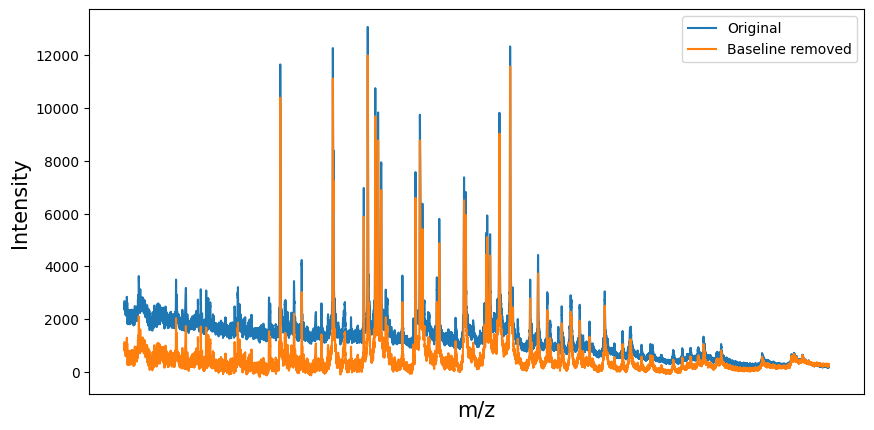

In [138]:
sample1 = sample.iloc[0,:]
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(sample1)
ax.plot(based_lined)
ax.xaxis.set_tick_params(labelbottom=False)
#sns.scatterplot(x = unique_peak_index, y = sample.iloc[unique_peak_index], 
#                color = 'red', alpha = 0.5)
ax.get_xaxis().set_ticks([])
plt.xlabel('m/z',fontsize=15)
plt.ylabel('Intensity',fontsize=15)
plt.legend(['Original','Baseline removed'])

In [139]:
def detect_peaks(mass_spectrum, threshold=30, distance=1000):
    peaks, _ = find_peaks(mass_spectrum, height=threshold, distance=distance)
    return peaks

In [140]:
base_dir = '../Dataset/Sub-Serovar'
sum_df = pd.DataFrame()
all_srv = []
for file_name in os.listdir(base_dir)[:1]:
    if file_name .startswith('.DS_Store'):
        continue
    df = pd.read_csv(base_dir+'/'+file_name)
    # baseline removal
    df = df.apply(lambda x: baseline_remove(x), axis = 1)
    print('Done')
    df.columns = [str(round(float(x),1)) for x in df.columns]
    ref_df = df.mean()
    peaks = detect_peaks(ref_df.to_numpy())
    print(file_name)
    print(ref_df[peaks])
    #ref_df.T.plot()
    # Highlight the peaks on the plot
    #plt.plot(peaks, ref_df[peaks], 'rx', label='Peaks')
    peaks_col = [float(x) for x in ref_df.index[peaks]]
    x = ref_df.index.astype(float)
    array = df.to_numpy().transpose()
    aligned = msalign(x, array, peaks_col, weights=[1 for x in ref_df[peaks]], only_shift=True, align_by_index=True)
    aligned_df = pd.DataFrame(aligned, columns=df.columns)
    aligned_df.columns = aligned_df.columns.astype(float)
    sum_df = pd.concat([sum_df,aligned_df],sort=True)
    srv_name = srv_map[file_name.split('.cs')[0]]
    all_srv.append(srv_name)


(40276,)
(40276,)
(40276,)
(40276,)
(40276,)
(40276,)
(40276,)
(40276,)
Done
Enteritidis 458.csv
2178.7      1413.447599
2508.9       429.400665
2823.7      1635.887346
3125.9      1298.245204
3629.7      1313.203206
4025.3       149.708974
4364.1     14548.071314
4760.8      2526.692550
5380.4     11874.741294
5738.8       778.411890
6254.6     13368.218494
6857.3       982.225963
7260.8      9799.188380
7718.7      3277.902367
8368.0      6063.215210
8918.4      4318.257541
9521.1     13449.287060
10283.2     3853.338143
10955.3     1350.464799
11473.7     1662.526613
12221.4     1072.586687
12767.1      743.756025
13647.6      335.167809
14490.4      625.624478
15227.2      359.882479
16014.6      366.086810
16779.6      126.387692
17465.2      275.793446
18631.1      311.591539
19798.2      249.238719
dtype: float64


In [141]:
peaks

array([  792,  2216,  3488,  4644,  6453,  7787,  8878, 10103, 11918,
       12920, 14309, 15861, 16862, 17965, 19474, 20708, 22016, 23612,
       24971, 25991, 27422, 28439, 30035, 31515, 32774, 34086, 35330,
       36421, 38228, 39981])

In [142]:
df.columns = df.columns.astype(float)
sample.columns = sample.columns.astype(float)

Text(0, 0.5, 'Intensity')

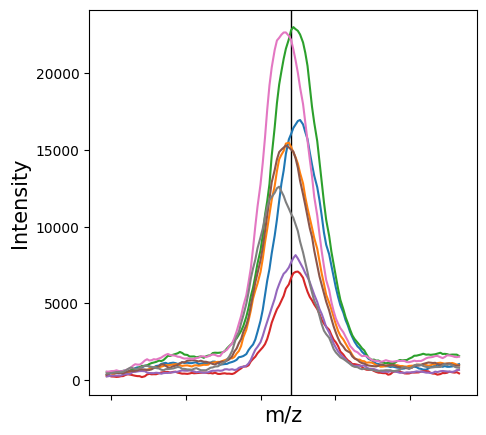

In [181]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.axvline(x=4364.1,c='black',linewidth=1)
for i, row in df.iloc[:,8800:8950].iterrows():
    ax.plot(row)
ax.xaxis.set_tick_params(labelbottom=False)
#sns.scatterplot(x = unique_peak_index, y = sample.iloc[unique_peak_index], 
#                color = 'red', alpha = 0.5)
#ax.get_xaxis().set_ticks([])
#ax.get_legend().remove()
plt.xlabel('m/z',fontsize=15)
plt.ylabel('Intensity',fontsize=15)

Text(0, 0.5, 'Intensity')

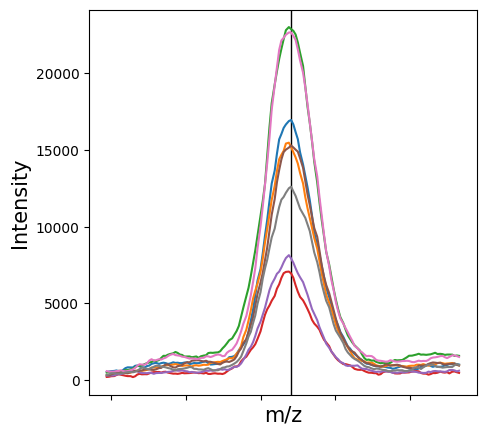

In [182]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.axvline(x=4364.1,c='black',linewidth=1)
for i, row in aligned_df.iloc[:,8800:8950].iterrows():
    ax.plot(row)
ax.xaxis.set_tick_params(labelbottom=False)
#sns.scatterplot(x = unique_peak_index, y = sample.iloc[unique_peak_index], 
#                color = 'red', alpha = 0.5)
#ax.get_xaxis().set_ticks([])
#ax.get_legend().remove()
plt.xlabel('m/z',fontsize=15)
plt.ylabel('Intensity',fontsize=15)

Text(0, 0.5, 'Intensity')

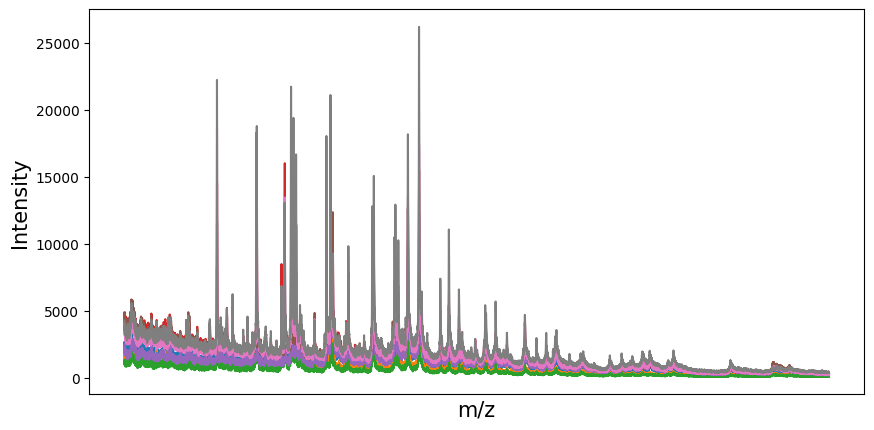

In [145]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
for i, row in sample.iterrows():
    ax.plot(row)
ax.xaxis.set_tick_params(labelbottom=False)
#sns.scatterplot(x = unique_peak_index, y = sample.iloc[unique_peak_index], 
#                color = 'red', alpha = 0.5)
ax.get_xaxis().set_ticks([])
#ax.get_legend().remove()
plt.xlabel('m/z',fontsize=15)
plt.ylabel('Intensity',fontsize=15)

Text(0, 0.5, 'Intensity')

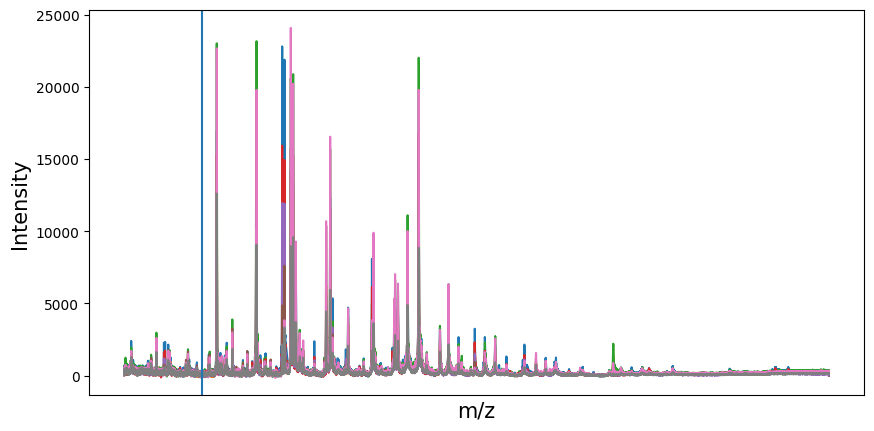

In [161]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
for i, row in aligned_df.iterrows():
    ax.plot(row)
ax.xaxis.set_tick_params(labelbottom=False)
#sns.scatterplot(x = unique_peak_index, y = sample.iloc[unique_peak_index], 
#                color = 'red', alpha = 0.5)
ax.get_xaxis().set_ticks([])
#ax.get_legend().remove()
plt.xlabel('m/z',fontsize=15)
plt.ylabel('Intensity',fontsize=15)

In [147]:
sample.columns

Index([2001.68273926, 2001.89697266, 2002.11120605, 2002.32543945,
       2002.53967285, 2002.75390625, 2002.96813965, 2003.18237305,
       2003.39672852, 2003.61096191,
       ...
       19975.6054688, 19976.2851563, 19976.9648438, 19977.6445313,
       19978.3242188, 19979.0039063, 19979.6835938, 19980.3632813,
       19981.0429688, 19981.7226563],
      dtype='float64', length=40276)

In [148]:
sample_before = df.iloc[0,:]
sample_after = aligned_df.iloc[0,:]

In [149]:
df

,2005.0,2005.3,2005.5,2005.7,2005.9,2006.1,2006.3,2006.6,2006.8,2007.0,...,19991.4,19992.0,19992.7,19993.4,19994.1,19994.8,19995.4,19996.1,19996.8,19997.5
0,456.417293,515.409408,561.401525,558.393643,504.385762,434.377882,441.370004,508.362128,641.354253,665.346379,...,259.157653,265.206951,271.256251,259.305552,257.354854,278.404158,283.453463,256.502770,272.552078,281.601387
1,225.505562,247.501924,319.498287,419.494651,404.491016,418.487382,359.483748,363.480116,415.476484,445.472854,...,210.035429,207.068300,198.101172,195.134045,202.166918,211.199793,188.232668,203.265545,219.298422,198.331300
2,400.104186,433.077648,473.051112,546.024579,567.998047,637.971517,562.944989,497.918463,497.891939,509.865417,...,320.790827,300.845415,335.900005,335.954596,363.009190,374.063786,367.118384,357.172984,382.227586,370.282190
3,385.136276,397.136749,391.137223,436.137698,483.138173,449.138650,446.139126,509.139604,547.140082,505.140560,...,153.686921,149.713397,140.739873,128.766350,133.792827,144.819305,166.845784,167.872263,157.898743,151.925224
4,320.674904,381.686717,476.698530,537.710344,544.722157,441.733971,424.745785,445.757599,506.769413,453.781228,...,116.785562,110.803606,121.821650,96.839694,100.857738,115.875783,111.893828,116.911873,94.929918,98.947963
5,442.705951,434.686985,442.668021,491.649059,493.630098,554.611138,553.592180,512.573224,559.554269,555.535316,...,280.426101,286.469591,268.513083,292.556576,276.600071,271.643568,263.687065,258.730565,257.774066,258.817569
6,427.455045,470.428815,485.402587,434.376360,440.350135,441.323912,365.297691,369.271471,367.245253,349.219037,...,264.672620,265.715949,284.759280,273.802612,246.845946,311.889282,304.932620,323.975959,310.019300,276.062643
7,368.819099,326.818042,309.816986,272.815930,251.814875,270.813820,354.812766,395.811713,316.810660,246.809608,...,114.324891,127.345692,131.366494,125.387296,143.408099,127.428902,127.449706,130.470511,114.491316,121.512122


In [150]:
aligned_df

,2005.0,2005.3,2005.5,2005.7,2005.9,2006.1,2006.3,2006.6,2006.8,2007.0,...,19991.4,19992.0,19992.7,19993.4,19994.1,19994.8,19995.4,19996.1,19996.8,19997.5
0,504.385762,434.377882,441.370004,508.362128,641.354253,665.346379,691.338507,701.330636,664.322767,683.314899,...,257.354854,278.404158,283.453463,256.502770,272.552078,281.601387,0.000000,0.000000,0.000000,0.000000
1,225.505562,247.501924,319.498287,419.494651,404.491016,418.487382,359.483748,363.480116,415.476484,445.472854,...,210.035429,207.068300,198.101172,195.134045,202.166918,211.199793,188.232668,203.265545,219.298422,198.331300
2,473.051112,546.024579,567.998047,637.971517,562.944989,497.918463,497.891939,509.865417,495.838897,425.812379,...,335.900005,335.954596,363.009190,374.063786,367.118384,357.172984,382.227586,370.282190,0.000000,0.000000
3,483.138173,449.138650,446.139126,509.139604,547.140082,505.140560,424.141040,428.141519,457.142000,455.142481,...,133.792827,144.819305,166.845784,167.872263,157.898743,151.925224,0.000000,0.000000,0.000000,0.000000
4,537.710344,544.722157,441.733971,424.745785,445.757599,506.769413,453.781228,431.793042,496.804857,562.816672,...,96.839694,100.857738,115.875783,111.893828,116.911873,94.929918,98.947963,0.000000,0.000000,0.000000
5,0.000000,0.000000,442.705951,434.686985,442.668021,491.649059,493.630098,554.611138,553.592180,512.573224,...,292.339126,299.382613,280.426101,286.469591,268.513083,292.556576,276.600071,271.643568,263.687065,258.730565
6,0.000000,0.000000,427.455045,470.428815,485.402587,434.376360,440.350135,441.323912,365.297691,369.271471,...,284.585967,289.629293,264.672620,265.715949,284.759280,273.802612,246.845946,311.889282,304.932620,323.975959
7,0.000000,0.000000,0.000000,0.000000,0.000000,368.819099,326.818042,309.816986,272.815930,251.814875,...,122.220892,121.241691,132.262490,115.283290,142.304090,114.324891,127.345692,131.366494,125.387296,143.408099


In [151]:
sample_before.index

Index([ 2005.0,  2005.3,  2005.5,  2005.7,  2005.9,  2006.1,  2006.3,  2006.6,
        2006.8,  2007.0,
       ...
       19991.4, 19992.0, 19992.7, 19993.4, 19994.1, 19994.8, 19995.4, 19996.1,
       19996.8, 19997.5],
      dtype='float64', length=40276)

In [152]:
sample_after.index

Index([ 2005.0,  2005.3,  2005.5,  2005.7,  2005.9,  2006.1,  2006.3,  2006.6,
        2006.8,  2007.0,
       ...
       19991.4, 19992.0, 19992.7, 19993.4, 19994.1, 19994.8, 19995.4, 19996.1,
       19996.8, 19997.5],
      dtype='float64', length=40276)

<Axes: >

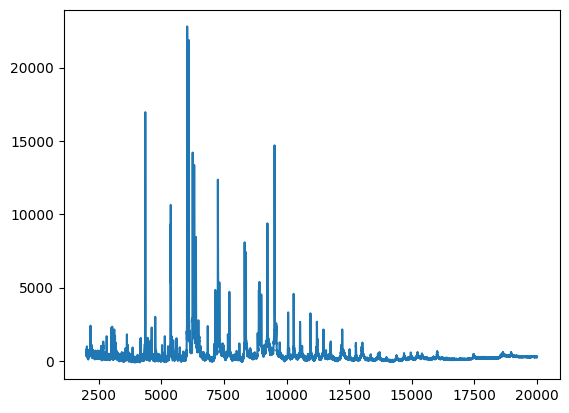

In [153]:
df.iloc[0,:].plot(legend=False)

<Axes: >

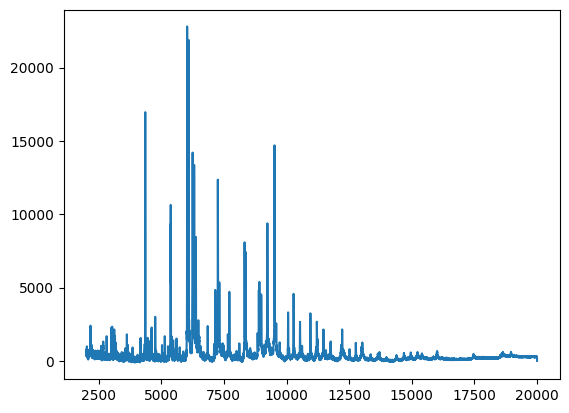

In [154]:
aligned_df.iloc[0,:].plot(legend=False)

In [155]:
aligned_df.columns

Index([ 2005.0,  2005.3,  2005.5,  2005.7,  2005.9,  2006.1,  2006.3,  2006.6,
        2006.8,  2007.0,
       ...
       19991.4, 19992.0, 19992.7, 19993.4, 19994.1, 19994.8, 19995.4, 19996.1,
       19996.8, 19997.5],
      dtype='float64', length=40276)

In [156]:
srv_col = []
for i in all_srv:
    for _ in range(8):
        srv_col.append(i)

In [157]:
sum_df['Serovar'] = srv_col

In [158]:
#sum_df.to_csv('baselined.csv',index=False)

In [159]:
#sum_df.iloc[:20,:1000].to_csv('baselined_small.csv',index=False)